# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

In [3]:
resource_name='algal_blooms'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
year,integer,
month,integer,
day,integer,
time,time,
latitude,number,
longitude,number,
depth,integer,
location,string,
akashiwo_sanguinea,number,Akashiwo sanguinea (cells/L)
alexandrium_spp,number,Alexandrium spp. (cells/L)


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,year,month,day,time,latitude,longitude,depth,location,akashiwo_sanguinea,alexandrium_spp,...,phaeophytin,phaeophytin_1,phaeophytin_2,phosphate,prorocentrum_spp,pseudo_nitzschia_delicatissima_group,pseudo_nitzschia_seriata_group,silicate,volume_settled_for_counting,water_temperature
0,2008,6,30,2018-09-26 15:00:00,32.867,-117.257,0,Scripps Pier,0.0,0.0,...,0.60,0.59,0.61,0.24,4640.0,8560.0,480.0,5.64,50.0,19.8
1,2008,7,2,2018-09-26 14:50:00,32.867,-117.257,0,Scripps Pier,NaN,NaN,...,0.53,0.53,0.52,0.19,NaN,NaN,NaN,6.50,NaN,19.7
2,2008,7,7,2018-09-26 15:00:00,32.867,-117.257,0,Scripps Pier,80.0,0.0,...,1.18,1.24,1.12,0.37,1040.0,55200.0,160.0,5.10,50.0,17.3
3,2008,7,10,2018-09-26 15:40:00,32.867,-117.257,0,Scripps Pier,NaN,NaN,...,0.52,0.51,0.53,0.24,NaN,NaN,NaN,5.00,NaN,19.5
4,2008,7,14,2018-09-26 14:55:00,32.867,-117.257,0,Scripps Pier,80.0,0.0,...,0.55,0.55,0.54,0.28,960.0,15120.0,480.0,4.10,50.0,21.7


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,5
datetime,1
number,24
other,0


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

,0,7
latitude,32.867,32.867
longitude,-117.257,-117.257
depth,0,0
location,Scripps Pier,Scripps Pier
da_volume_filtered,200,NaN


# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 1 columns):
time    663 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.3 KB


None

,count,unique,top,freq,first,last
time,663,139,2018-09-26 16:10:00,27,2018-09-26 14:45:00,2018-09-26 21:00:00


# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 24 columns):
year                                    663 non-null int64
month                                   663 non-null int64
day                                     663 non-null int64
akashiwo_sanguinea                      394 non-null float64
alexandrium_spp                         394 non-null float64
ammonia                                 530 non-null float64
chlorophyll                             663 non-null float64
chlorophyll_1                           663 non-null float64
chlorophyll_2                           663 non-null float64
dinophysis_spp                          394 non-null float64
domoic_acid                             40 non-null float64
lingulodinium_polyedrum                 394 non-null float64
nitrate                                 530 non-null float64
nitrite                                 530 non-null float64
phaeophytin                             663 non-

None

,count,mean,std,min,25%,50%,75%,max
year,663.0,2011.319759,2.075687,2008.00,2010.0000,2011.000,2013.0000,2016.00
month,663.0,6.576169,3.439135,1.00,4.0000,7.000,10.0000,12.00
day,663.0,15.591252,8.797163,1.00,8.0000,16.000,23.0000,31.00
akashiwo_sanguinea,394.0,1782.720812,11659.813234,0.00,0.0000,0.000,0.0000,126400.00
alexandrium_spp,394.0,65.225888,294.794925,0.00,0.0000,0.000,0.0000,2121.00
ammonia,530.0,0.596962,0.481459,0.00,0.2700,0.490,0.8075,3.73
chlorophyll,663.0,2.678673,4.426154,0.22,1.1000,1.640,2.5300,59.91
chlorophyll_1,663.0,2.685309,4.506029,0.22,1.0900,1.630,2.5100,60.37
chlorophyll_2,663.0,2.667014,4.350525,0.21,1.0900,1.640,2.5300,59.44
dinophysis_spp,394.0,255.786802,1010.377107,0.00,0.0000,0.000,80.0000,16000.00


## Distributions

In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


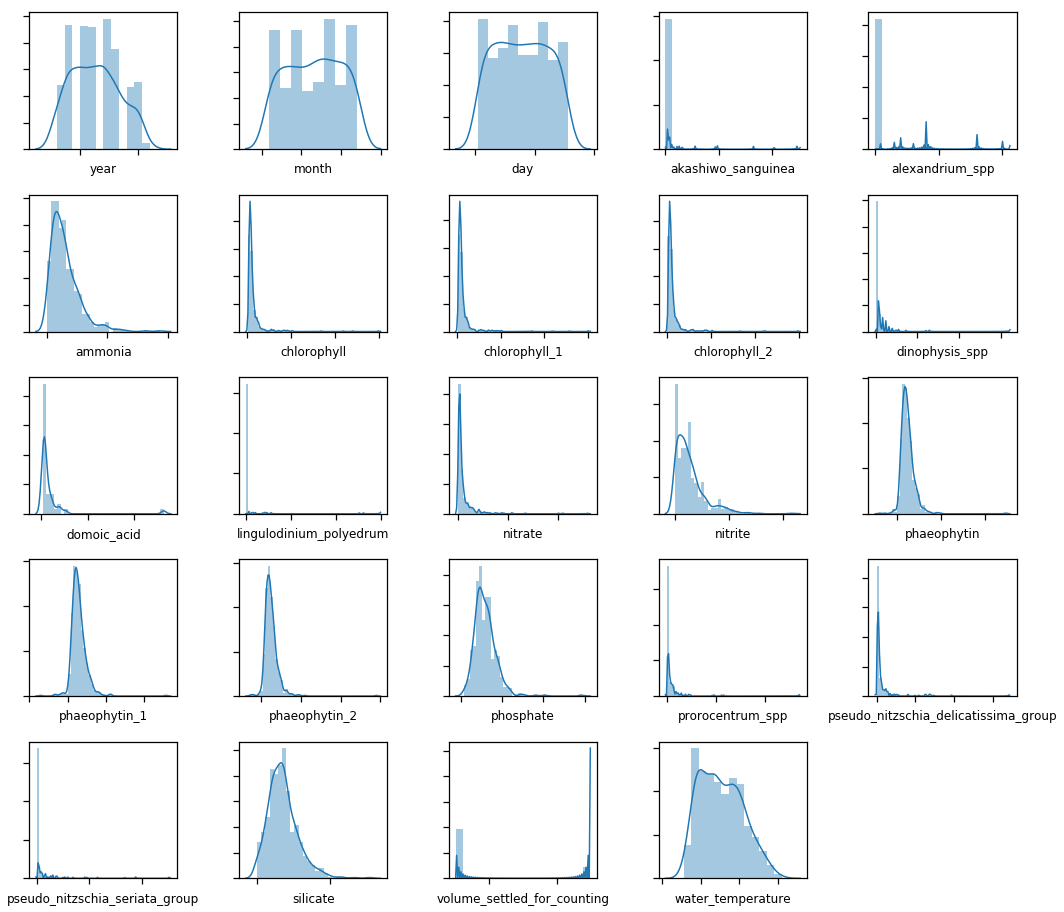

In [14]:
plot_histograms(df[number_col_names])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

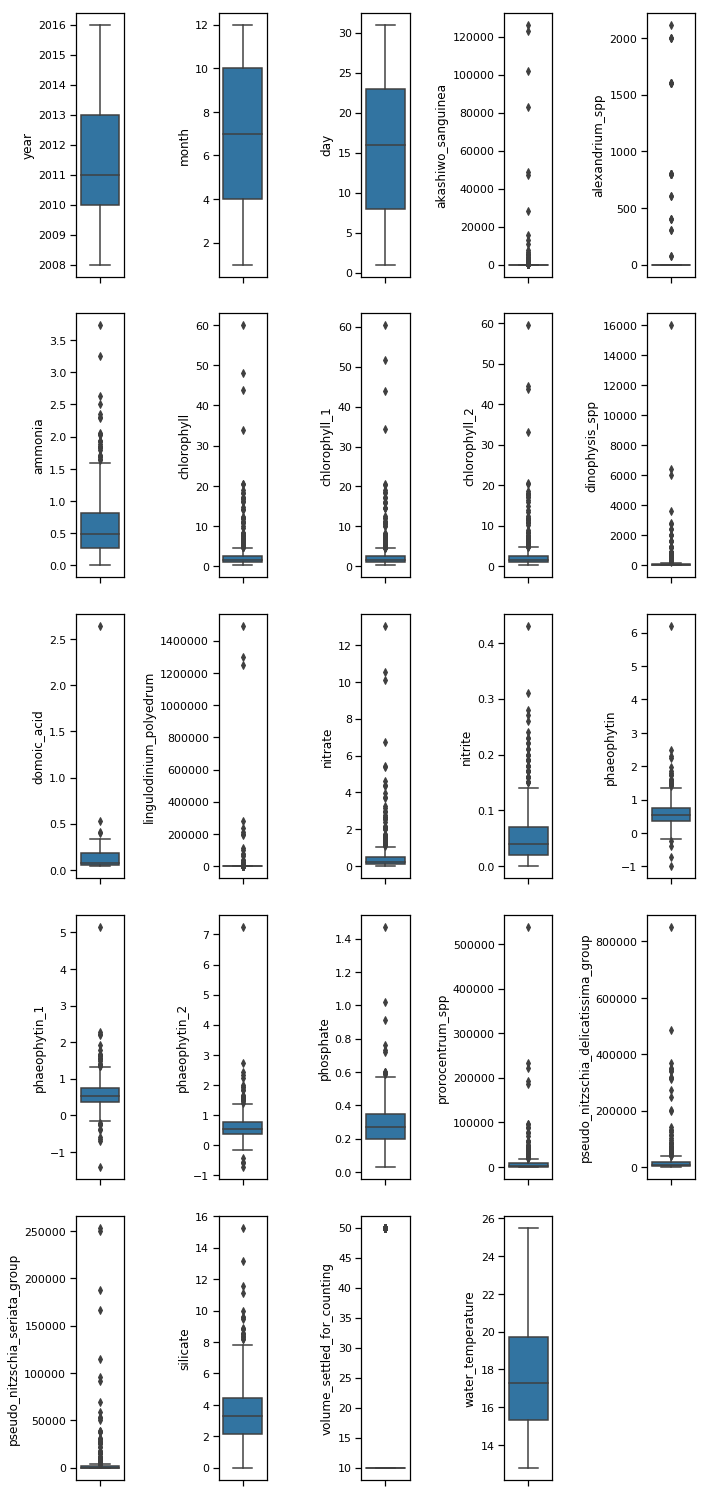

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

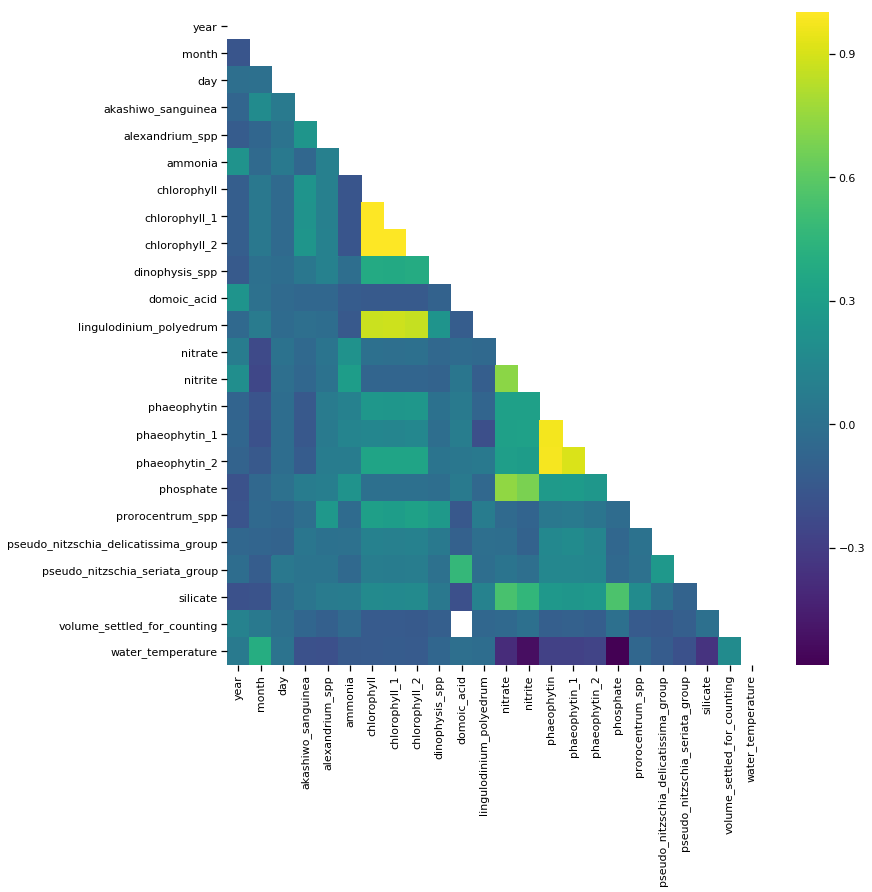

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

# Nulls


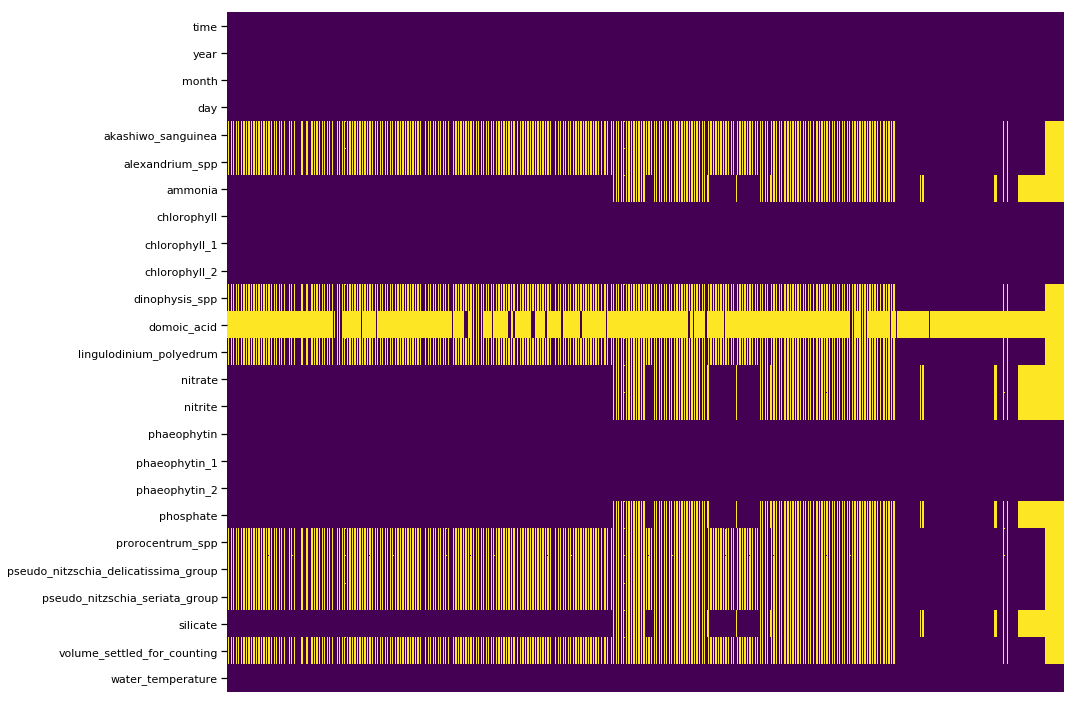

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )